# Lab 6-1  Temperature gradients in and below the snow

This lab was actually written by Jessica, based on the prior labs by Eli Schwat and Danny Hogan.   May 2023

In [32]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## User-provided inputs

Here we define a few variables to be used in the notebook. You may or may not want to change these values.

In [49]:
# Provide the path to a directory you want to download the SoS files to
download_directory = '../data/sosnoqc/'

# Provide a the start and end dates you want to download
start_date_mid = '20230131'
end_date_mid = '20230202'

start_date_late = '20230331'
end_date_late = '20230402'

start_date_early = '20221224'
end_date_early = '20221227'

# Provide the specific variables you want to extract from the dataset.
# We provide these in advance because the datasets are very large and, 
# when we open them, we want to immediately extract only the data we want.
# Right now we want the temperature recordings from in the snowpack... or we hope are in the snowpack...
# These are available next to the upwind (uw) tower and the downwind (d) tower.
# We also measure soil temperature at xx depths at the downwind tower 
# For comparison, we also download the 2 m air temperature from the central tower (c).
VARIABLES = [
    'Tsnow_0_4m_uw',
    'Tsnow_0_5m_uw',
    'Tsnow_0_6m_uw',
    'Tsnow_0_7m_uw',
    'Tsnow_0_8m_uw',
    'Tsnow_0_9m_uw',
    'Tsnow_1_0m_uw',
    'Tsnow_1_1m_uw',
    'Tsnow_1_2m_uw',
    'Tsnow_1_3m_uw',
    'Tsnow_1_4m_uw',
    'Tsnow_1_5m_uw',
    'Tsoil_0_6cm_d',
    'Tsoil_1_9cm_d',
    'Tsoil_3_1cm_d',
    'Tsoil_4_4cm_d',
    'Tsoil_8_1cm_d',
    'Tsoil_9_4cm_d',
    'Tsoil_10_6cm_d',
    'Tsoil_11_9cm_d',
    'Tsoil_18_1cm_d',
    'Tsoil_19_4cm_d',
    'Tsoil_20_6cm_d',
    'Tsoil_21_9cm_d',
    'Tsoil_28_1cm_d',
    'Tsoil_29_4cm_d',
    'Tsoil_30_6cm_d',
    'Tsoil_31_9cm_d',
    'Tsnow_0_4m_d',
    'Tsnow_0_5m_d',
    'Tsnow_0_6m_d',
    'Tsnow_0_7m_d',
    'Tsnow_0_8m_d',
    'Tsnow_0_9m_d',
    'Tsnow_1_0m_d',
    'Tsnow_1_1m_d',
    'Tsnow_1_2m_d',
    'Tsnow_1_3m_d',
    'Tsnow_1_4m_d',
    'Tsnow_1_5m_d',
    'T_2m_c',
]

### Download SoS NetCDF files from an NCAR FTP server

Define a function for downloading daily SoS NetCDF filesm

In [35]:
def download_sos_data_day(date, local_download_dir, cache=True):
    """Download a netcdf file from the ftp url provided by the Earth Observing 
    Laboratory at NCAR. Data comes in one NetCDF file per day, Reynolds-Averaged 
    with a 5-minute averaging period.

    Args:
        date (str, optional): String representing a date in format '%Y%m%d'. Defaults to '20221101'.
        local_download_dir (str, optional): Directory to which files will be downloaded. Defaults 
                    to 'sosnoqc'; this directory will be created if it  does not already exist.
        cache (bool, optional): If True, looks in `local_download_dir` for requested  file, if it 
                    exists, does not redownload file. If False, downloads file from the FTP server.

    Returns:
        _type_: Relative path to the downloaded file
    """
    base_url = 'ftp.eol.ucar.edu'
    path = 'pub/archive/isfs/projects/SOS/netcdf/noqc_geo'
    file = f'isfs_{date}.nc'
    os.makedirs(local_download_dir, exist_ok=True)
    full_file_path = os.path.join('ftp://', base_url, path, file)
    download_file_path = os.path.join(local_download_dir, file)
    if cache and os.path.isfile(download_file_path):
        print(f"Caching...skipping download for {date}")
    else:
        urllib.request.urlretrieve(
            full_file_path,
            download_file_path   
        )
    return download_file_path

Use the function defined above to download all the files we specified. When you run the cell below this comment, this will ~3-5 minutes if you are downloading more than a few days.

In [37]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date_mid, '%Y%m%d'),
    dt.datetime.strptime(end_date_mid, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

# Download one daily file for each date in the datelist. 
# cache = True so that when we rerun the notebook in the future, we don't have to redownload the data.
files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]

# Open up datasets from every day, extracting our VARIABLES of choice as we open individual datasets. This is so that we have a smaller dataset held 
# in computer memory.
all_datasets = [xr.open_dataset(file)[VARIABLES] for file in files]
sos_dataset_mid = xr.concat(all_datasets, dim='time')

Caching...skipping download for 20230131
Caching...skipping download for 20230201
Caching...skipping download for 20230202


In [50]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date_late, '%Y%m%d'),
    dt.datetime.strptime(end_date_late, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

# Download one daily file for each date in the datelist. 
# cache = True so that when we rerun the notebook in the future, we don't have to redownload the data.
files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]

# Open up datasets from every day, extracting our VARIABLES of choice as we open individual datasets. This is so that we have a smaller dataset held 
# in computer memory.
all_datasets = [xr.open_dataset(file)[VARIABLES] for file in files]
sos_dataset_late = xr.concat(all_datasets, dim='time')

Caching...skipping download for 20230331
Caching...skipping download for 20230401
Caching...skipping download for 20230402


In [39]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date_early, '%Y%m%d'),
    dt.datetime.strptime(end_date_early, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

# Download one daily file for each date in the datelist. 
# cache = True so that when we rerun the notebook in the future, we don't have to redownload the data.
files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]

# Open up datasets from every day, extracting our VARIABLES of choice as we open individual datasets. This is so that we have a smaller dataset held 
# in computer memory.
all_datasets = [xr.open_dataset(file)[VARIABLES] for file in files]
sos_dataset_early = xr.concat(all_datasets, dim='time')

Caching...skipping download for 20221224
Caching...skipping download for 20221225
Caching...skipping download for 20221226
Caching...skipping download for 20221227


# Problem 1
Using the data presented in labs, pick three different 3-day-durationperiods in each of early season (Nov-Dec), mid season (Jan-Feb) and late season (April). Plot the temperatures. Determine which of the “snow temperature” sensors are actually in the snow at each side. Also determine which sensors are “broken” and displaying nonsensicle results. Explain your answers.

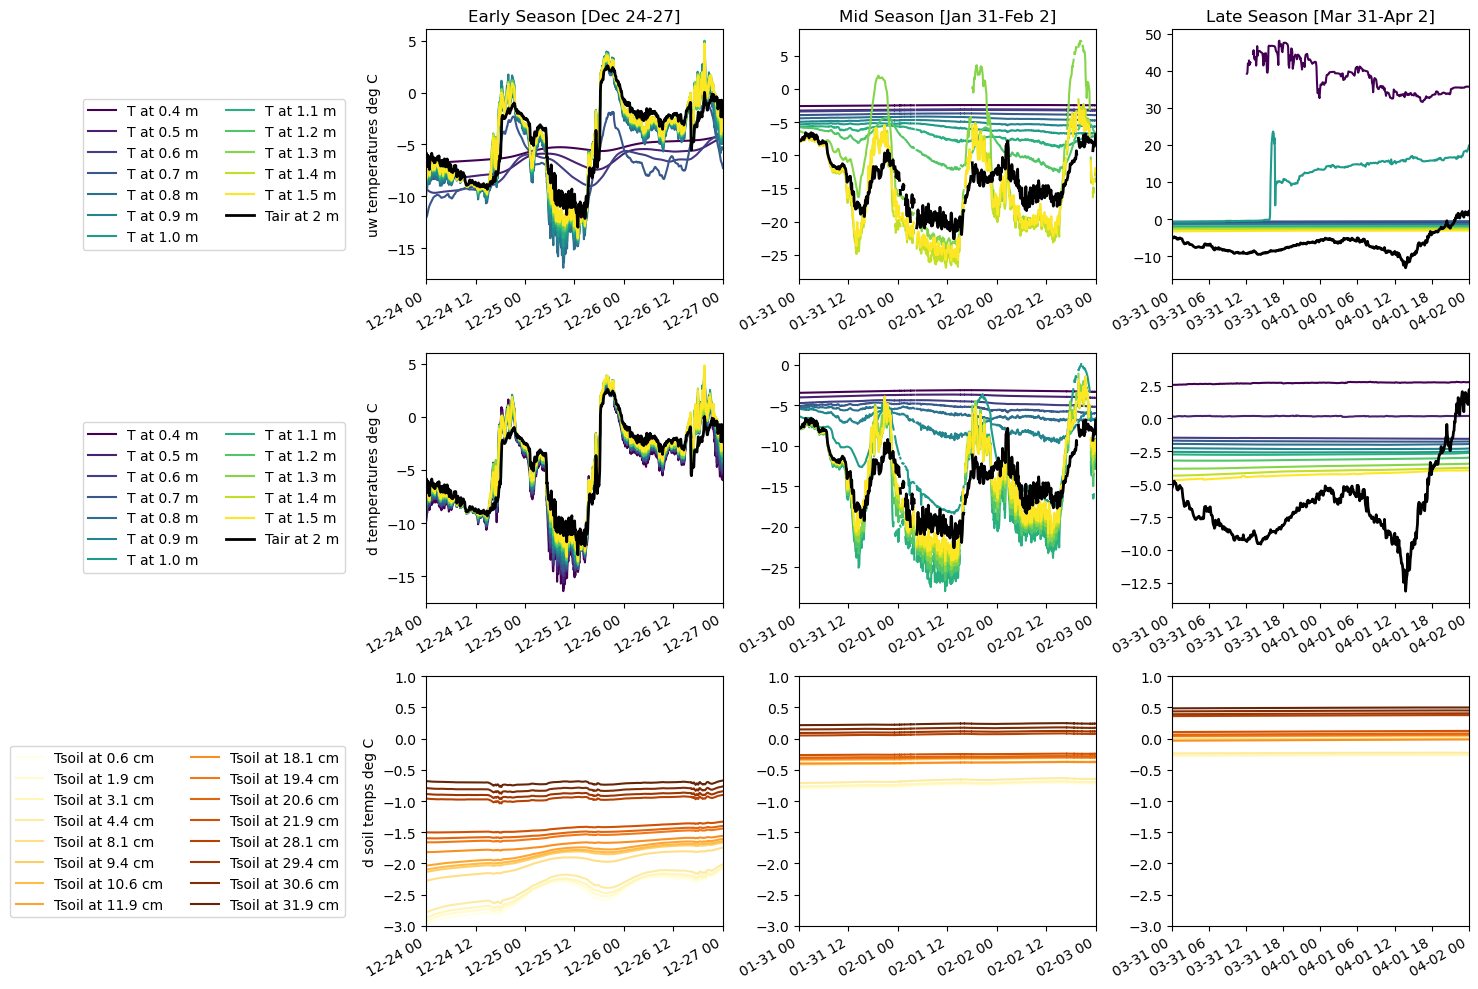

In [72]:
#first, let's make a plot with all of the data, not aggregated to hourly
colors = plt.cm.viridis(np.linspace(0, 1, 12))
fig, axes = plt.subplots(3, 3, figsize=(15,10), tight_layout=True)
axes = axes.ravel()
title = ['Early Season [Dec 24-27]','Mid Season [Jan 31-Feb 2]', 'Late Season [Mar 31-Apr 2]']
sos_datasets = [sos_dataset_early, sos_dataset_mid, sos_dataset_late]
for i,sos_dataset in enumerate(sos_datasets):
    sos_dataset['Tsnow_0_4m_uw'].plot(ax=axes[i], label='T at 0.4 m', color=colors[0])
    sos_dataset['Tsnow_0_5m_uw'].plot(ax=axes[i], label='T at 0.5 m', color=colors[1])
    sos_dataset['Tsnow_0_6m_uw'].plot(ax=axes[i], label='T at 0.6 m', color=colors[2])
    sos_dataset['Tsnow_0_7m_uw'].plot(ax=axes[i], label='T at 0.7 m', color=colors[3])
    sos_dataset['Tsnow_0_8m_uw'].plot(ax=axes[i], label='T at 0.8 m', color=colors[4])
    sos_dataset['Tsnow_0_9m_uw'].plot(ax=axes[i], label='T at 0.9 m', color=colors[5])
    sos_dataset['Tsnow_1_0m_uw'].plot(ax=axes[i], label='T at 1.0 m', color=colors[6])
    sos_dataset['Tsnow_1_1m_uw'].plot(ax=axes[i], label='T at 1.1 m', color=colors[7])
    sos_dataset['Tsnow_1_2m_uw'].plot(ax=axes[i], label='T at 1.2 m', color=colors[8])
    sos_dataset['Tsnow_1_3m_uw'].plot(ax=axes[i], label='T at 1.3 m', color=colors[9])
    sos_dataset['Tsnow_1_4m_uw'].plot(ax=axes[i], label='T at 1.4 m', color=colors[10])
    sos_dataset['Tsnow_1_5m_uw'].plot(ax=axes[i], label='T at 1.5 m', color=colors[11])
    # also, add on the 2 m air temperature here for comparison
    sos_dataset['T_2m_c'].plot(ax=axes[i], label='Tair at 2 m', lw=2, color='k')

    sos_dataset['Tsnow_0_4m_d'].plot(ax=axes[i+3], label='T at 0.4 m', color=colors[0])
    sos_dataset['Tsnow_0_5m_d'].plot(ax=axes[i+3], label='T at 0.5 m', color=colors[1])
    sos_dataset['Tsnow_0_6m_d'].plot(ax=axes[i+3], label='T at 0.6 m', color=colors[2])
    sos_dataset['Tsnow_0_7m_d'].plot(ax=axes[i+3], label='T at 0.7 m', color=colors[3])
    sos_dataset['Tsnow_0_8m_d'].plot(ax=axes[i+3], label='T at 0.8 m', color=colors[4])
    sos_dataset['Tsnow_0_9m_d'].plot(ax=axes[i+3], label='T at 0.9 m', color=colors[5])
    sos_dataset['Tsnow_1_0m_d'].plot(ax=axes[i+3], label='T at 1.0 m', color=colors[6])
    sos_dataset['Tsnow_1_1m_d'].plot(ax=axes[i+3], label='T at 1.1 m', color=colors[7])
    sos_dataset['Tsnow_1_2m_d'].plot(ax=axes[i+3], label='T at 1.2 m', color=colors[8])
    sos_dataset['Tsnow_1_3m_d'].plot(ax=axes[i+3], label='T at 1.3 m', color=colors[9])
    sos_dataset['Tsnow_1_4m_d'].plot(ax=axes[i+3], label='T at 1.4 m', color=colors[10])
    sos_dataset['Tsnow_1_5m_d'].plot(ax=axes[i+3], label='T at 1.5 m', color=colors[11])
    sos_dataset['T_2m_c'].plot(ax=axes[i+3], label='Tair at 2 m', lw=2, color='k')

    # Add t soil
    YlOrBr = plt.cm.YlOrBr(np.linspace(0, 1, 16))
    sos_dataset['Tsoil_0_6cm_d'].plot(ax=axes[i+6], label='Tsoil at 0.6 cm', color=YlOrBr[0])
    sos_dataset['Tsoil_1_9cm_d'].plot(ax=axes[i+6], label='Tsoil at 1.9 cm', color=YlOrBr[1])
    sos_dataset['Tsoil_3_1cm_d'].plot(ax=axes[i+6], label='Tsoil at 3.1 cm', color=YlOrBr[2])
    sos_dataset['Tsoil_4_4cm_d'].plot(ax=axes[i+6], label='Tsoil at 4.4 cm', color=YlOrBr[3])
    sos_dataset['Tsoil_8_1cm_d'].plot(ax=axes[i+6], label='Tsoil at 8.1 cm', color=YlOrBr[4])
    sos_dataset['Tsoil_9_4cm_d'].plot(ax=axes[i+6], label='Tsoil at 9.4 cm', color=YlOrBr[5])
    sos_dataset['Tsoil_10_6cm_d'].plot(ax=axes[i+6], label='Tsoil at 10.6 cm', color=YlOrBr[6])
    sos_dataset['Tsoil_11_9cm_d'].plot(ax=axes[i+6], label='Tsoil at 11.9 cm', color=YlOrBr[7])
    sos_dataset['Tsoil_18_1cm_d'].plot(ax=axes[i+6], label='Tsoil at 18.1 cm', color=YlOrBr[8])
    sos_dataset['Tsoil_19_4cm_d'].plot(ax=axes[i+6], label='Tsoil at 19.4 cm', color=YlOrBr[9])
    sos_dataset['Tsoil_20_6cm_d'].plot(ax=axes[i+6], label='Tsoil at 20.6 cm', color=YlOrBr[10])
    sos_dataset['Tsoil_21_9cm_d'].plot(ax=axes[i+6], label='Tsoil at 21.9 cm', color=YlOrBr[11])
    sos_dataset['Tsoil_28_1cm_d'].plot(ax=axes[i+6], label='Tsoil at 28.1 cm', color=YlOrBr[12])
    sos_dataset['Tsoil_29_4cm_d'].plot(ax=axes[i+6], label='Tsoil at 29.4 cm', color=YlOrBr[13])
    sos_dataset['Tsoil_30_6cm_d'].plot(ax=axes[i+6], label='Tsoil at 30.6 cm', color=YlOrBr[14])
    sos_dataset['Tsoil_31_9cm_d'].plot(ax=axes[i+6], label='Tsoil at 31.9 cm', color=YlOrBr[15])
    axes[0].legend(ncols=2, bbox_to_anchor=(-0.25,0.75))
    axes[3].legend(ncols=2, bbox_to_anchor=(-0.25,0.75))
    axes[6].legend(ncols=2, bbox_to_anchor=(-0.25,0.75))
    axes[i].set_xlabel("")
    axes[i+3].set_xlabel("")
    axes[i+6].set_xlabel("")
    axes[i].set_title(title[i])
    axes[i+6].set_ylim(-3,1)

    if i == 0:
        axes[i].set_xlim(dt.datetime(2022,12,24), dt.datetime(2022,12,27))
        axes[i+3].set_xlim(dt.datetime(2022,12,24), dt.datetime(2022,12,27))
        axes[i+6].set_xlim(dt.datetime(2022,12,24), dt.datetime(2022,12,27))
        axes[i].set_ylabel("uw temperatures deg C")
        axes[i+3].set_ylabel("d temperatures deg C")
        axes[i+6].set_ylabel("d soil temps deg C")
    elif i == 1:
        axes[i].set_xlim(dt.datetime(2023,1,31), dt.datetime(2023,2,3))
        axes[i+3].set_xlim(dt.datetime(2023,1,31), dt.datetime(2023,2,3))
        axes[i+6].set_xlim(dt.datetime(2023,1,31), dt.datetime(2023,2,3))
        axes[i].set_ylabel("")
        axes[i+3].set_ylabel("")
        axes[i+6].set_ylabel("")
    elif i == 2:
        axes[i].set_xlim(dt.datetime(2023,3,31), dt.datetime(2023,4,2))
        axes[i+3].set_xlim(dt.datetime(2023,3,31), dt.datetime(2023,4,2))
        axes[i+6].set_xlim(dt.datetime(2023,3,31), dt.datetime(2023,4,2))
        axes[i].set_ylabel("")
        axes[i+3].set_ylabel("")
        axes[i+6].set_ylabel("")

plt.show()

### Discussion
For the early season, the UW tower appears to have 3-4 thermistors buried at this time (right aroung Christmas). In contrast, the D tower thermistors do not appear to be buried at all since all the thermistors track closely with temperature. This does make sense to me since we were able to show that a significant amount of snow was blown around a few days prior and loaded the region around UW, whereas other areas saw snow loss. Looking at soil temperatures, we see a warmup across the board, but much colder temperatures near the surface. This is likely an artifact of the deep, cold temperatures that we saw in November before we had ample snow cover. As snow insulated the soil, the temperatures rose as the heat of the Earth heated the soils from below. 

In mid-season, we see between 5-6 thermistors buried at D and 7-8 buried at UW. We also begin to see some artifacts in the temperature signal at both UW and D for thermistors above the surface of the snow. Large temperature differences between the thermistors and the 2m temperature occur around the time of the maximum temperature each day. The spikes in the thermistor temperature could be due to heating of the thermistor element itself, the nearby tower, or the structure the thermistor is attached to. Soil temperatures have increased substantially from where they were in the early season. The insulating snowpack stopped the continued decreases in temperature and the heat from lower down in the Earth worked to warm up the soil temperatures. 

In the late season, we see almost all thermistors at both locations are fully buried. Two thermistors at each site (not sure about there precise depth) appear to show errant values. At UW, the extreme temperatures (50 degrees C at one location) are clearly an artifact likely related to one of these sensitive thermistors breaking. The jump in the other value on 3/31 is likely showing exactly when that other thermistor went awry. All other values in the snowpack are near zero, with the near surface temperatures the coldest. Air temperature during this time was still rather cold, so the snowpack was not yet isothermal. The above freezing readings at D likely are also signals of thermistors breaking. There is maybe a chance (since this thermistor is low in the snowpack) that it could be hitting a branch or bush, but we tried our best to mitigate the influence of surrounding bushes when we installed these. I'm also not sure if a bush would even be as warm as 2.5C after being buried in the snow so long. 

### Problem 2 
Static stability is related to the change in temperature with height. If you choose to use the sounding data, you must be sure to use potential temperature. For this problem, just focus on our data from the surface to 20 m, and it's okay to just use temperature within that narrow elevation range. The change in temperature with height above the surface is a measure of the stability. Pick out three different days in our dataset and calculate dT/dz over the first 2 meters and over the first 20 meters. Make plots of temperature vs elevation. Is the change in temperature with height linear? Does that depend on the day? What do you think controls the change in temperature with height over the snow? Feel free to plot some other variables from earlier labs to test your hypotheses.

In [133]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = ['20221204','20230219','20230410']

files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]
VARS_T = [f'T_{x}m_c' for x in range(1,21)]
VARS_T.extend(['spd_10m_c','spd_5m_c','spd_2m_c','Rsw_in_9m_d','tc_2m_c',"Vtherm_d", "Vpile_d","IDir_d"])
all_datasets = [xr.open_dataset(file)[VARS_T] for file in files]
sos_dataset_temp = xr.concat(all_datasets, dim='time')

import pytz
def add_local_time(ds):
    time_utc = ds['time'].to_index().tz_localize(pytz.UTC)
    us_mtn = pytz.timezone('US/Mountain')
    tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
    local_da=xr.DataArray.from_series(tz_corrected)
    ds.coords.update({'local_time':tz_corrected})
    return ds
sos_dataset_temp = add_local_time(sos_dataset_temp)

Caching...skipping download for 20221204
Caching...skipping download for 20230219
Caching...skipping download for 20230410


In [95]:
# The function below calculates the surface temperatures from the Apogees
def apogee2temp(ds,tower):
    # hard-coded sensor-specific calibrations
    Vref = 2.5
    ID = ds[f"IDir_{tower}"]
    sns = [136, 137, 138, 139, 140]
    im = [ sns.index(x) if x in sns else None for x in ID ][0]
    # unclear if we want these, or scaled up versions
    mC0 = [57508.575,56653.007,58756.588,58605.7861, 58756.588][im] * 6e4
    mC1 = [289.12189,280.03380,287.12487,285.00285, 287.12487][im] * 6e4
    mC2 = [2.16807,2.11478,2.11822,2.08932, 2.11822][im] * 6e4
    bC0 = [-168.3687,-319.9362,-214.5312,-329.6453, -214.5312][im]* 6e4
    bC1 = [-0.22672,-1.23812,-0.59308,-1.24657, -0.59308][im]* 6e4
    bC2 = [0.08927,0.08612,0.10936,0.09234, 0.10936][im]* 6e4
    # read data
    Vtherm = ds[f"Vtherm_{tower}"]
    Vpile = ds[f"Vpile_{tower}"]*1000
    # calculation of detector temperature from Steinhart-Hart
    Rt = 24900.0/((Vref/Vtherm) - 1)
    Ac = 1.129241e-3
    Bc = 2.341077e-4
    Cc = 8.775468e-8
    TDk = 1/(Ac + Bc*np.log(Rt) + Cc*(np.log(Rt)**3))
    TDc = TDk - 273.15
    # finally, calculation of "target" temperature including thermopile measurement
    m = mC2*TDc**2 + mC1*TDc + mC0
    b = bC2*TDc**2 + bC1*TDc + bC0
    TTc = (TDk**4 + m*Vpile + b)**0.25 - 273.15
    # sufs = suffixes(TTc,leadch='') # get suffixes
    # dimnames(TTc)[[2]] = paste0("Tsfc.Ap.",sufs)
    return TTc

In [137]:
sos_dataset_temp['Tsurf_d'] = (['time'],  apogee2temp(sos_dataset_temp, 'd').values)

First, lets choose a day back in early December when it was still relatively warm and little snow had accumulated:

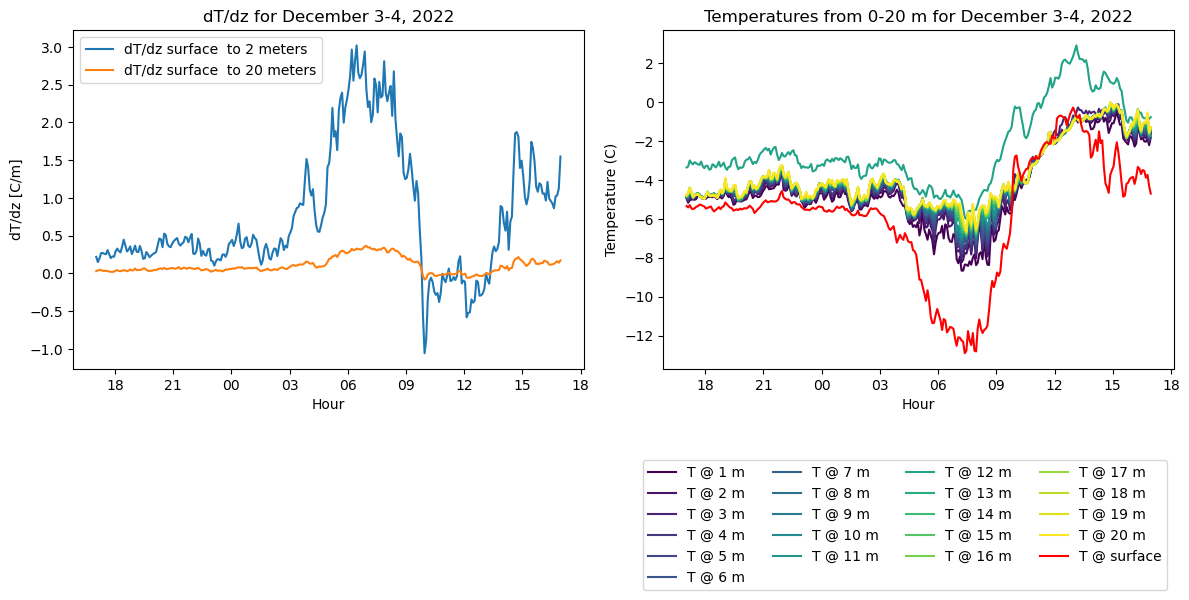

In [120]:
import matplotlib.dates as mdates
# Choose our day
date = '20221204'
# Grab the data for this day
ds = sos_dataset_temp.sel(time=slice('20221204','20221205'))

# Calculate dT/dz for 1-2m and 1-20m
dz = 2
dT_dz_2 = (ds['T_2m_c'] - ds['Tsurf_d'])/dz

dz = 20
dT_dz_20 = (ds['T_20m_c'] - ds['Tsurf_d'])/dz

# Plot temperature against elevation above the surface
temps = [f'T_{x}m_c' for x in range(1,21)]

# Plots
fig, axs = plt.subplots(ncols=2, tight_layout=True, figsize=(12,6))
axs[0].plot(ds['local_time'],dT_dz_2, label='dT/dz surface  to 2 meters')
axs[0].plot(ds['local_time'],dT_dz_20, label='dT/dz surface  to 20 meters')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[0].legend()
axs[0].set_ylabel('dT/dz [C/m]')
axs[0].set_xlabel('Hour')
axs[0].set_title('dT/dz for December 3-4, 2022')

colors = plt.cm.viridis(np.linspace(0, 1, 20))
for i,temp in enumerate(temps):
    axs[1].plot(ds['local_time'], ds[temp], label=f'T @ {i+1} m', color=colors[i])
axs[1].plot(ds['local_time'], ds['Tsurf_d'], label=f'T @ surface', color='red')
axs[1].set_ylabel('Temperature (C)')
axs[1].set_xlabel('Hour')
axs[1].set_title('Temperatures from 0-20 m for December 3-4, 2022')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[1].legend(bbox_to_anchor=(1,-0.25), ncols=4)

Discussion:
The first plot on the left of dT/dz show that the gradient in temperature is much stronger closer to the surface than it is from the surface to 20 meters, particularly at night. During the day, the gradient is minimized as the snow surface heats up. Even though albedo is high, the snow still absorbs and emit a certain amount of radiation, so the signature in heating shows up. Below, I show the timing and magnitude of solar radiation for the day and the timing of solar radiation aligns with the decrease in temperature gradient. It was a mostly cloudy over the day with some clearing near morning and somewhat mild temperatures. The strong gradient that built overnight likely meant that winds were generally weak and did not promote mixing of the near-surface layer. The increase in gradient later in the evening probably was due to clearing clouds, as we can see the surface temperature drop dramatically around 4AM. billy barr's description over the day aligns with this idea: 

"mostly cloudy to cloudy overnight and warm with some clearing and cooling near sunrise.  Clouds move in fast mid-morning turning it cloudy but still calm and warming, going between mostly cloudy and cloudy through the day until staying cloudy mid-afternoon on." (Daily description for December 4, 2022 https://www.gothicwx.org/2022-daily-description.html)

The weak wind hypothesis is corroborated with the weak (below 2.5 m/s) wind speeds over the day. Additionally, sensible heat flux values at 2m match what we might expect would be happening over this period: overnight, turbulent heat transfer would come from the warmer (relatively) air above the surface and move downward towards the colder surface. This matches with the direction of sensible heat flux, which has a sign convention of positive moving up and away from the surface. As the day heats up, the weak turbulent transfer moves towards zero (and slightly above). The generally isothermal atmosphere that built up towards the afternoon would not imply strong sensible heat fluxes would be in place with weak winds and a small gradient.

Text(0.5, 1.0, 'Sensible Heat Flux for December 3-4, 2022')

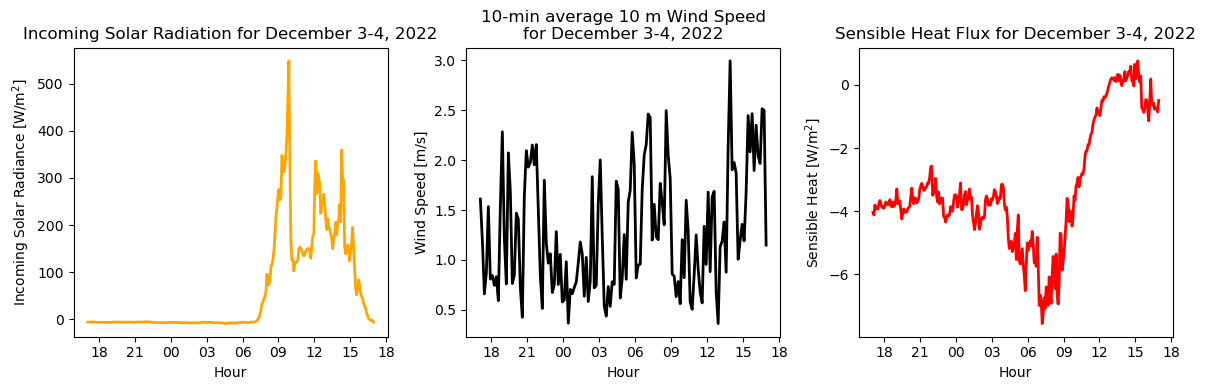

In [128]:
# Plot downwelling solar radiation for this day and wind 
fig, axs = plt.subplots(ncols=3, tight_layout=True, figsize=(12,4))
# Plot downwelling solar
axs[0].plot(ds['local_time'],ds['Rsw_in_9m_d'], label='dT/dz surface  to 2 meters',color='orange', lw=2)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[0].set_ylabel('Incoming Solar Radiance [W/m$^2$]')
axs[0].set_xlabel('Hour')
axs[0].set_title('Incoming Solar Radiation for December 3-4, 2022')
# Plot wind speed
axs[1].plot(ds['local_time'].resample(time='10min').mean(),ds['spd_10m_c'].resample(time='10min').mean(),color='k', lw=2)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[1].set_ylabel('Wind Speed [m/s]')
axs[1].set_xlabel('Hour')
axs[1].set_title('10-min average 10 m Wind Speed\nfor December 3-4, 2022')
# Plot sensible heat flux
axs[2].plot(ds['local_time'],ds['tc_2m_c'],color='r', lw=2)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[2].set_ylabel('Sensible Heat [W/m$^2$]')
axs[2].set_xlabel('Hour')
axs[2].set_title('Sensible Heat Flux for December 3-4, 2022')

Next, we'll look at a cold winter day in February that may have had some clouds and wind

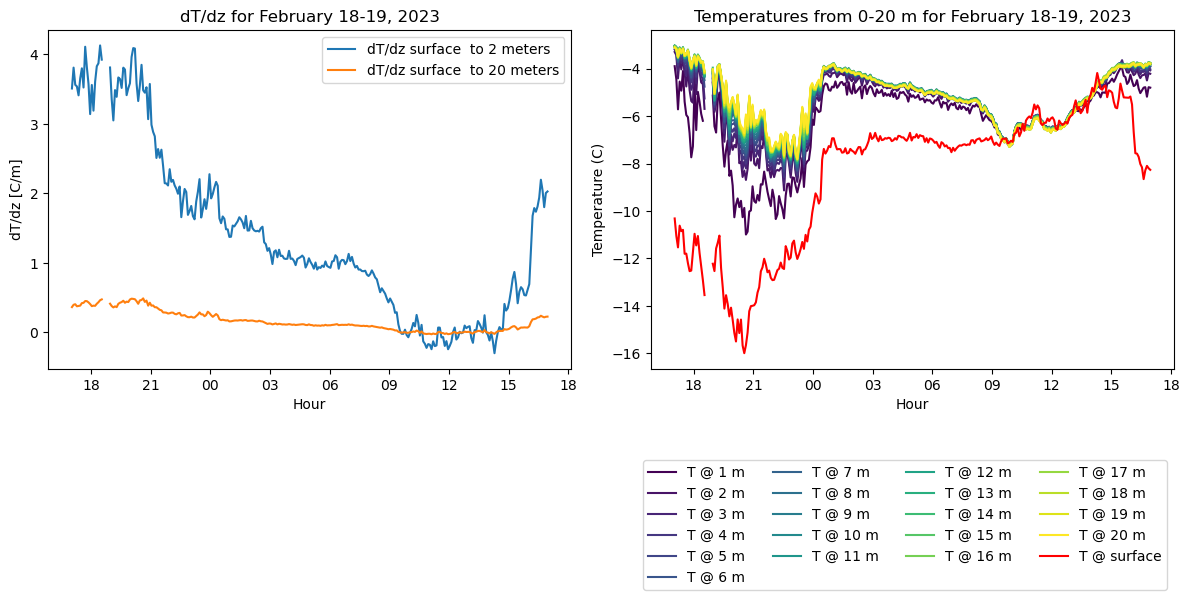

In [129]:
import matplotlib.dates as mdates
# Choose our day
date = '20230219'
# Grab the data for this day
ds = sos_dataset_temp.sel(time=slice('20230219','20230220'))

# Calculate dT/dz for 1-2m and 1-20m
dz = 2
dT_dz_2 = (ds['T_2m_c'] - ds['Tsurf_d'])/dz

dz = 20
dT_dz_20 = (ds['T_20m_c'] - ds['Tsurf_d'])/dz

# Plot temperature against elevation above the surface
temps = [f'T_{x}m_c' for x in range(1,21)]

# Plots
fig, axs = plt.subplots(ncols=2, tight_layout=True, figsize=(12,6))
axs[0].plot(ds['local_time'],dT_dz_2, label='dT/dz surface  to 2 meters')
axs[0].plot(ds['local_time'],dT_dz_20, label='dT/dz surface  to 20 meters')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[0].legend()
axs[0].set_ylabel('dT/dz [C/m]')
axs[0].set_xlabel('Hour')
axs[0].set_title('dT/dz for February 18-19, 2023')

colors = plt.cm.viridis(np.linspace(0, 1, 20))
for i,temp in enumerate(temps):
    axs[1].plot(ds['local_time'], ds[temp], label=f'T @ {i+1} m', color=colors[i])
axs[1].plot(ds['local_time'], ds['Tsurf_d'], label=f'T @ surface', color='red')
axs[1].set_ylabel('Temperature (C)')
axs[1].set_xlabel('Hour')
axs[1].set_title('Temperatures from 0-20 m for February 18-19, 2023')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[1].legend(bbox_to_anchor=(1,-0.25), ncols=4)

Discussion: This February day started off with some colder temperatures (especially overnight) and a weakening temperature gradient as a storm was rolling in. I remember this day vividly as I was racing on skis for most of the morning. A warm front had arrived overnight and started some snowfall, so clouds had moved in and lead to a drop in the temperature gradient as the sun rose. We can see a signature of the front arrival timing right around midnight with a rapid increase in temperature at all levels and an increase in winds at 10 meters (see below). With the weakening temperature gradient, we see an absolute decrease (moving towards 0) in sensible heat flux. Even though it was windy and not strongly stable at this time, without a strong temperature gradient and unstable setup, turbulent transer was not significant. Later in the the day, the sun did come out and winds stayed breezy, so we stayed relatively isothermal or weakly stable.

Text(0.5, 1.0, 'Sensible Heat Flux for February 18-19, 2023')

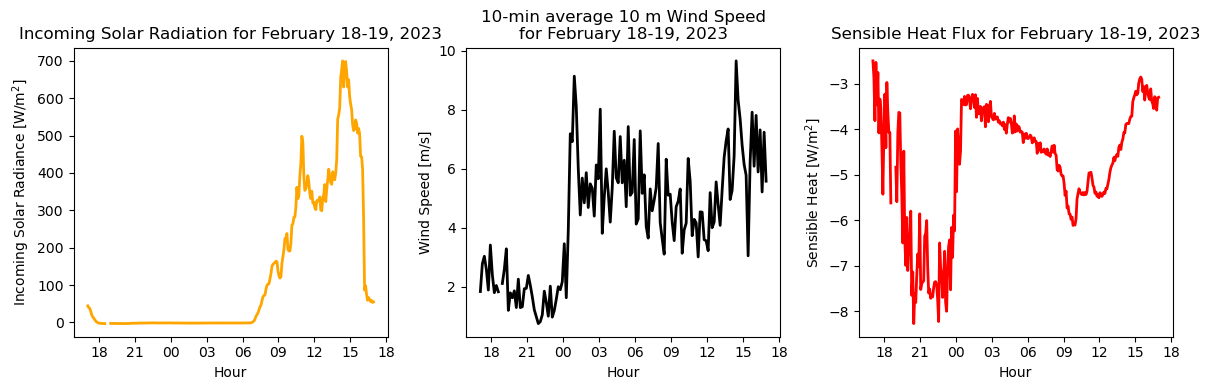

In [130]:
# Plot downwelling solar radiation for this day and wind speed at 10m over the day
fig, axs = plt.subplots(ncols=3, tight_layout=True, figsize=(12,4))
# Plot downwelling solar
axs[0].plot(ds['local_time'],ds['Rsw_in_9m_d'], label='dT/dz surface  to 2 meters',color='orange', lw=2)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[0].set_ylabel('Incoming Solar Radiance [W/m$^2$]')
axs[0].set_xlabel('Hour')
axs[0].set_title('Incoming Solar Radiation for February 18-19, 2023')
# Plot wind speed
axs[1].plot(ds['local_time'].resample(time='10min').mean(),ds['spd_10m_c'].resample(time='10min').mean(),color='k', lw=2)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[1].set_ylabel('Wind Speed [m/s]')
axs[1].set_xlabel('Hour')
axs[1].set_title('10-min average 10 m Wind Speed\nfor February 18-19, 2023')
# Plot sensible heat flux
axs[2].plot(ds['local_time'],ds['tc_2m_c'],color='r', lw=2)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[2].set_ylabel('Sensible Heat [W/m$^2$]')
axs[2].set_xlabel('Hour')
axs[2].set_title('Sensible Heat Flux for February 18-19, 2023')

Next, we'll look at a warmr day in April:

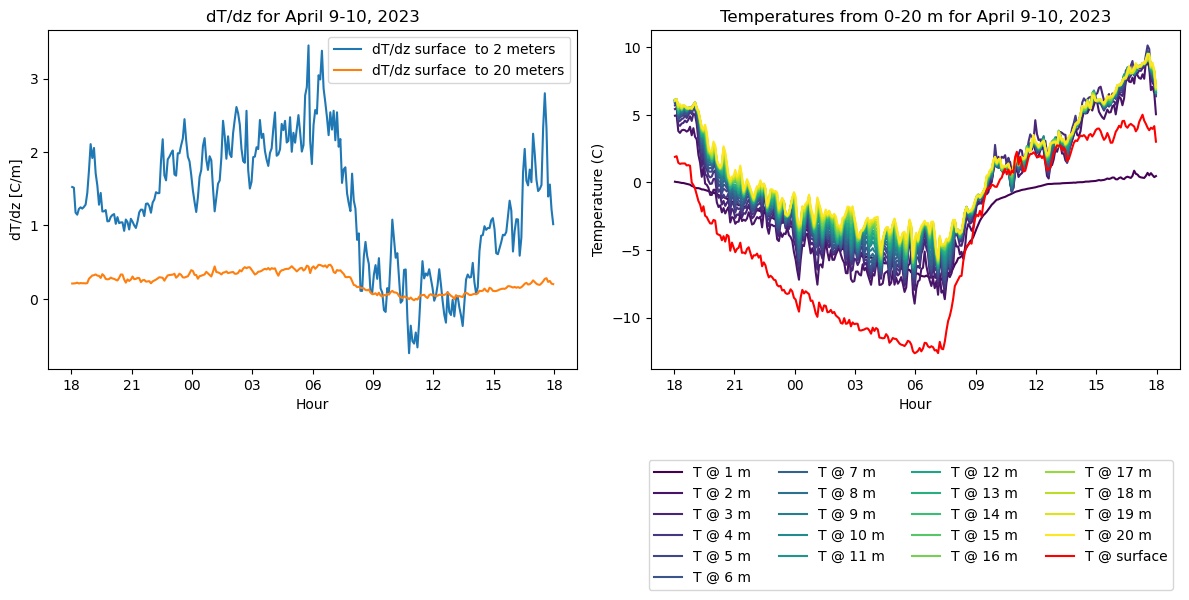

In [138]:
import matplotlib.dates as mdates
# Choose our day
date = '20230410'
# Grab the data for this day
ds = sos_dataset_temp.sel(time=slice('20230410','20230411'))

# Calculate dT/dz for 1-2m and 1-20m
dz = 2
dT_dz_2 = (ds['T_2m_c'] - ds['Tsurf_d'])/dz

dz = 20
dT_dz_20 = (ds['T_20m_c'] - ds['Tsurf_d'])/dz

# Plot temperature against elevation above the surface
temps = [f'T_{x}m_c' for x in range(1,21)]

# Plots
fig, axs = plt.subplots(ncols=2, tight_layout=True, figsize=(12,6))
axs[0].plot(ds['local_time'],dT_dz_2, label='dT/dz surface  to 2 meters')
axs[0].plot(ds['local_time'],dT_dz_20, label='dT/dz surface  to 20 meters')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[0].legend()
axs[0].set_ylabel('dT/dz [C/m]')
axs[0].set_xlabel('Hour')
axs[0].set_title('dT/dz for April 9-10, 2023')

colors = plt.cm.viridis(np.linspace(0, 1, 20))
for i,temp in enumerate(temps):
    axs[1].plot(ds['local_time'], ds[temp], label=f'T @ {i+1} m', color=colors[i])
axs[1].plot(ds['local_time'], ds['Tsurf_d'], label=f'T @ surface', color='red')
axs[1].set_ylabel('Temperature (C)')
axs[1].set_xlabel('Hour')
axs[1].set_title('Temperatures from 0-20 m for April 9-10, 2023')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[1].legend(bbox_to_anchor=(1,-0.25), ncols=4)

Discussion: For this April period, we see the same situation as above, with near surface gradients being the strongest compared to the larger 0-20m gradient in temperature. Again we see the most stability overnight and a near-zero temperature gradient during the day. This day was exceptionally clear, with incoming shortwave only slightly perturbed during the morning. Temperatures rose above freezing at all levels, implying that melting of the snowpack was occuring. I'm suspect of the strongly above zero surface temperatures, as I would expect temperatures to be at 0 with melt. This is an artifact of optimizing the apogee temperatures to the radiometer measurements. If we return the coefficient multiplier back to 1e5 (from 6e4), the maximum surface temperature would be zero (we'll have to decide what we trust most). Regardless, we see a drop in stability over the day and again an increase in stability overnight. Wind speed over the day was strong in the late April 9th and early April 10 hours, before dropping over the course of April 10. It appears the wind speed decrease and increasing stability may have had an impact on the drop in sensible heat seen overnight. On the other hand, during the day, a weakening temperature gradient and plenty of sunshine to warm the atmosphere appeared to contribute most to the rise in sensbile heat flux and heat looks like it started to move away from the surface and mix into the near-surface layer. Over the day, winds were weak and more constant (if not stronger near the surface) with height.

Text(0.5, 1.0, 'Sensible Heat Flux for April 9-10, 2023')

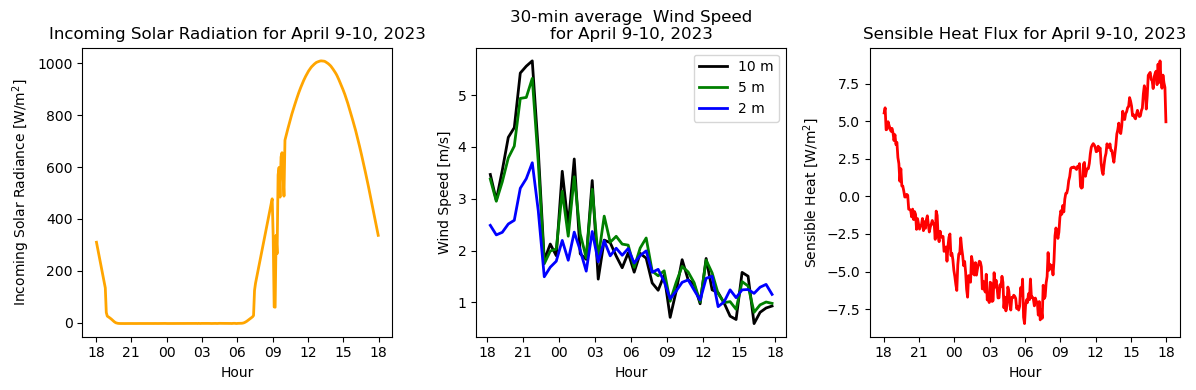

In [140]:
# Plot downwelling solar radiation for this day and wind speed at 10m over the day
fig, axs = plt.subplots(ncols=3, tight_layout=True, figsize=(12,4))
# Plot downwelling solar
axs[0].plot(ds['local_time'],ds['Rsw_in_9m_d'], label='dT/dz surface  to 2 meters',color='orange', lw=2)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[0].set_ylabel('Incoming Solar Radiance [W/m$^2$]')
axs[0].set_xlabel('Hour')
axs[0].set_title('Incoming Solar Radiation for April 9-10, 2023')
# Plot wind speed
axs[1].plot(ds['local_time'].resample(time='30min').mean(),ds['spd_10m_c'].resample(time='30min').mean(),color='k', lw=2, label='10 m')
axs[1].plot(ds['local_time'].resample(time='30min').mean(),ds['spd_5m_c'].resample(time='30min').mean(),color='g', lw=2, label='5 m')
axs[1].plot(ds['local_time'].resample(time='30min').mean(),ds['spd_2m_c'].resample(time='30min').mean(),color='b', lw=2, label='2 m')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[1].set_ylabel('Wind Speed [m/s]')
axs[1].set_xlabel('Hour')
axs[1].set_title('30-min average  Wind Speed\nfor April 9-10, 2023')
axs[1].legend()
# Plot sensible heat flux
axs[2].plot(ds['local_time'],ds['tc_2m_c'],color='r', lw=2)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axs[2].set_ylabel('Sensible Heat [W/m$^2$]')
axs[2].set_xlabel('Hour')
axs[2].set_title('Sensible Heat Flux for April 9-10, 2023')

## BONUS:  Our data lend themselves to studying the thermal conductivy of snow through application of the 1-dimensional heat equation

Here, we examine code provided [here](http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html).  This is a commonly solved equation in numerical methods for PDEs.  We are using the simplest method to solve this and it it is far from the best.

Note that the python code below needs help, so this is a challenge exercise for those good at coding.  

In [30]:
K = 0.13 #W/m/deg this is the thermal conductivity of snow at a density of 180 kg/m^3 from Jeff Dozier
ro = 180 #kg/m^2 this is the density of near-surface snow referenced by Jeff
C = 1.9*10**(-3) # specific heat of ice, check if this works or need something else for snow?
a = K/(ro*C) # the thermal diffusivity of snow, which is what we need for the heat equation

T = 3600*24*3 #number of seconds in time (end point of simulation)
Nt = T #I think we want a timestamp every second
L = 1 #we go down to depth of 1 meter
Nx = 100 # we have a vertical simulation resolution of every cm
#I'm thinking of x as like z but starting from the top going down

# we need initial condition of snow temperature with depth
I   = np.zeros(Nx+1)
for i in range(0, Nx):
    I[i] = 273.15-5 #start with every depth at -5 C, in K so don't have 0 values

# timestepping code from the website
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = np.linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
F = a*dt/dx**2
u   = np.zeros((Nx+1,Nt))           # unknown u at new time level
u_1 = np.zeros((Nx+1,Nt))           # u at the previous time level

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i,0] = I[int(x[i])]

for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        u[i,n] = u_1[i,n] + F*(u_1[i-1,n-1] - 2*u_1[i,n] + u_1[i+1,n+1])

    # Insert boundary conditions
    u[0,:] = 0;  u[Nx,:] = 0

    # Update u_1 before next step
    u_1[:]= u

C:\Users\dlhogan\AppData\Local\Temp\ipykernel_19672\1342042321.py:33: RuntimeWarning: overflow encountered in double_scalars
  u[i,n] = u_1[i,n] + F*(u_1[i-1,n-1] - 2*u_1[i,n] + u_1[i+1,n+1])


KeyboardInterrupt: 

In [28]:
I

array([268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15, 268.15,
       268.15, 268.15, 268.15, 268.15,   0.  ])